<a href="https://colab.research.google.com/github/theofarouk/IMDA/blob/main/FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial emotion recognition  

The aim of this lab (TP) is to is to recognize facial emotions from a video using deep learning approach. The system can take pictures or video form webcam as input. It detects all faces in each frame, and then classifies the emotions as belonging to one of the 7 emotion categories: Angry, Disgusted, Neutral, Sad, Happy, Surprised and Fear.  Facial landmarks are used to localize and represent salient regions of the face, such as: eyes, eyebrows nose, mouth jawline. They have been successfully applied to face alignment, head pose estimation, face swapping, blink detection and much more.  

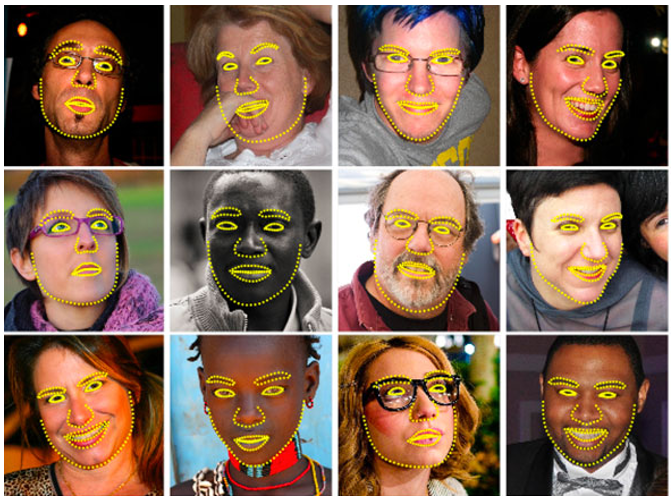

We propose here to develop an approach based on famous facial landmarks (68 facial landmarks can be detected with dlib library), which and use the Eucledian distance between them as 68x68 array and use them as feature to learn a network.  Propose a neuron network composed only of a few layers of full connected layers like this architecture:

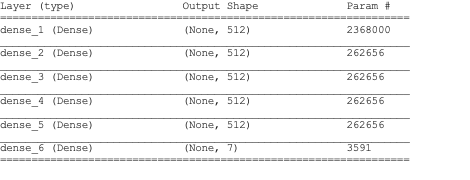

To train this network, you can use the dataset (train_test_landmarks.zip extracted from a mixture of CK+ and JAFFE datasets) already prepared as feature vector of distances with the format:(741, 4624) for train and (365, 4624) for test. After the learning, save you best model.  Now, in order to use the vector of these distances to classify emotions in real time capture, you need first to capture your video streaming from a webcam. Then, for each frame you detect the face region, extract the facial landmarks and then compute the 4624 distances between them.   The following script allow to capture the face region using Haar detector (haarcascade_frontalface_default.xml) and detect 68 facial landmarks using the learned model (shape_predictor_68_face_landmarks.dat).

Here you find the data files:
https://drive.google.com/file/d/1nz7cOYqE_7-ORtWNdPQvrPUiOzofTNBv/view?usp=sharing

In [ ]:
import numpy as np

import cv2

from imutils import face_utils

import imutils

import dlib



# -----------------------------

# opencv initialization

face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)



emotions = ('Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise')

# initialize dlib's face detector and create a predictor

detector = dlib.get_frontal_face_detector()

predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")





def detect_parts(image):

    # resize the image, and convert it to grayscale

    image = imutils.resize(image, width=200, height=200)



    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detect faces in the grayscale image

    rects = detector(gray, 1)



    # loop over the face detections

    for (i, rect) in enumerate(rects):

        shape = predictor(gray, rect)

        shape = face_utils.shape_to_np(shape)
        distances = euclidean_all(shape)




        # visualize all facial landmarks with a transparent overlay

        output = face_utils.visualize_facial_landmarks(image, shape)

        cv2.imshow("Image", output)

        cv2.waitKey(0)

    return distances



def euclidean(a, b):

    dist = math.sqrt(math.pow((b[0] - a[0]), 2) + math.pow((b[1] - a[1]), 2))

    return dist



# calculates distances between all 68 elements

def euclidean_all(a):

   distances = ""

   for i in range(0, len(a)):

      for j in range(0, len(a)):

         dist = euclidean(a[i], a[j])

         dist = "%.2f" % dist;

         distances = distances + " " + str(dist)

   return distances

while (True):
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)  # draw rectangle to main image
        detected_face = img[int(y):int(y + h), int(x):int(x + w)]  # crop detected face
        distances = detect_parts(detected_face)
        #predictions = model.predict(val)  # store probabilities of 6 expressions
        # find max indexed array ( 'Angry' , 'Disgust' , 'Fear' , 'Happy'  , 'Neutral' ,  'Sad' , 'Surprise')

        # for example
        emotion = emotions[2]

        # write emotion text above rectangle
        cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    cv2.imshow('img', img)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # press q to quit
        break

# kill open cv things
cap.release()
cv2.destroyAllWindows()

**Question 1:** Develop your emotion recognition system to perform the recognition in real time.

**Question 2:** Propose another model based on a CNN extracted directly from the frame images. To do this, uses the subsets (train_test_faceImages.zip extracted from FER2013 dataset.